In [12]:
# Data import/inspection
import pandas as pd

df = pd.read_csv('Data/marketing_campaign.csv', delimiter=';')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
# Checking/correcting 'Income'
df['Income'].isnull().sum()
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Income'].isnull().sum()

C:\Users\werle\AppData\Local\Temp\ipykernel_15808\784691891.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


0

In [14]:
# Convert/verify 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [15]:
# Convert/verify categorical columns to 'category' data type
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Response'] = df['Response'].astype('category')
df[['Education', 'Marital_Status', 'Response']].dtypes

Education         category
Marital_Status    category
Response          category
dtype: object

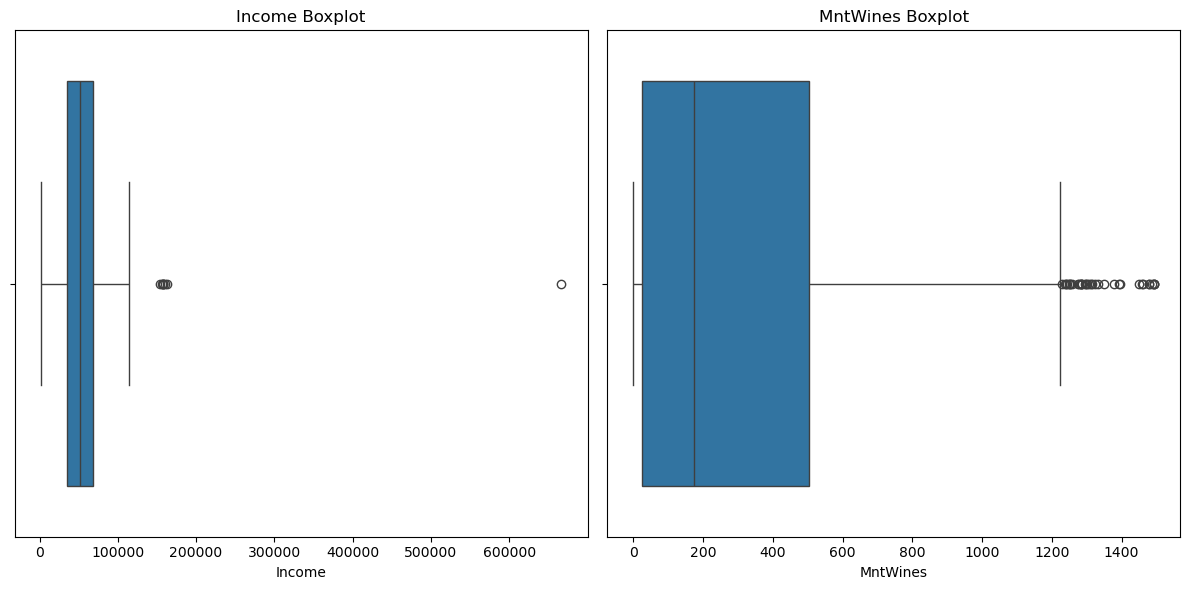

In [16]:
# Checking 'Income' and 'MntWines' for outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Income boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Income'])
plt.title('Income Boxplot')

# Plot MntWines boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['MntWines'])
plt.title('MntWines Boxplot')

plt.tight_layout()
plt.show()

#Will inspect and address outliers during EDA steps

In [17]:
# Date and age features
df['Age'] = 2026 - df['Year_Birth']

df['Recency_Months'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days // 30
df[['Age', 'Recency_Months']].head()


,Age,Recency_Months
0,69,162
1,72,144
2,61,151
3,42,145
4,45,146


In [18]:
# Step 1: Check for unrealistic birth years
current_year = 2026
min_birth_year = current_year - 100  # Customer can't be older than 100
max_birth_year = current_year - 18   # Customer can't be younger than 18

# Identify rows where 'Year_Birth' is outside the expected range
invalid_birth_years = df[(df['Year_Birth'] < min_birth_year) | (df['Year_Birth'] > max_birth_year)]

# Display invalid birth year entries
print(f"Number of invalid 'Year_Birth' entries: {invalid_birth_years.shape[0]}")
if invalid_birth_years.shape[0] > 0:
    print(invalid_birth_years[['ID', 'Year_Birth']])

# Removing invalid rows, confirm
df = df[(df['Year_Birth'] >= min_birth_year) & (df['Year_Birth'] <= max_birth_year)]
print(f"Data after removing invalid 'Year_Birth' entries: {df.shape[0]} rows")


Number of invalid 'Year_Birth' entries: 3
        ID  Year_Birth
192   7829        1900
239  11004        1893
339   1150        1899
Data after removing invalid 'Year_Birth' entries: 2237 rows


In [19]:
# Save the cleaned dataset
df.to_csv('Data/cleaned_marketing_campaign.csv', index=False)
